# Introduction

This lab demonstrates how to perform hierarchical clustering with connectivity constraints using the Scikit-learn library in Python. In hierarchical clustering, clusters are formed by recursively merging or splitting them based on the distance between them. Connectivity constraints can be used to restrict the formation of clusters based on the connectivity between data points, which can result in more meaningful clusters.

# Generate Data

We start by generating the Swiss Roll dataset using the **make_swiss_roll** function from Scikit-learn. The Swiss Roll dataset is a 3D dataset with a spiral shape.

In [1]:
from sklearn.datasets import make_swiss_roll

n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)
# Make it thinner
X[:, 1] *= 0.5

# Unstructured Hierarchical Clustering

We perform AgglomerativeClustering which comes under Hierarchical Clustering without any connectivity constraints.

In [2]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(X)
label = ward.labels_

# Plot Unstructured Hierarchical Clusters

We plot the unstructured hierarchical clusters using the **matplotlib** library.

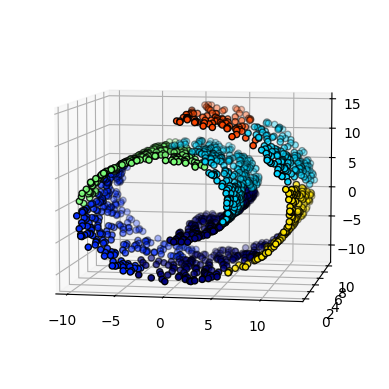

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=-80)
for l in np.unique(label):
    ax1.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )

# Structured Hierarchical Clustering

We define k-Nearest Neighbors with 10 neighbors using the **kneighbors_graph** function from Scikit-learn.

In [5]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)

We perform AgglomerativeClustering again with connectivity constraints.

In [6]:
ward = AgglomerativeClustering(
    n_clusters=6, connectivity=connectivity, linkage="ward"
).fit(X)
label = ward.labels_

# Plot Structured Hierarchical Clusters

We plot the structured hierarchical clusters using the **matplotli**b library.

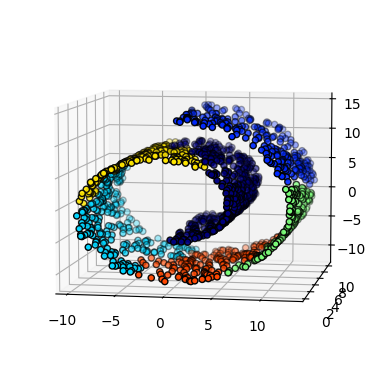

In [7]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection="3d", elev=7, azim=-80)
for l in np.unique(label):
    ax2.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )

# Summary

This lab demonstrated how to perform hierarchical clustering with connectivity constraints using the Scikit-learn library in Python. We first generated the Swiss Roll dataset and performed unstructured hierarchical clustering. We then defined k-Nearest Neighbors with 10 neighbors and performed structured hierarchical clustering. Finally, we plotted both the unstructured and structured hierarchical clusters using the **matplotlib** library.